In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

botvinnik_df = pd.read_csv('botvinnik_df.csv')

In [2]:
botvinnik_df.head()

,player_id,game_id,position_id,position_fen,whose_turn,result_white_win,result_draw,result_black_win,player_color,player_piece_activity,opponent_piece_activity,player_protected_pieces,opponent_protected_pieces,MaeToi_white_win,MaeToi_black_win,MaeToi_draw
0,0,0,0,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR,w,0,0,1,black,22,22,20,20,2.744563,2.280528,2.909326
1,0,0,1,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR,b,0,0,1,black,22,28,20,17,2.086527,1.506525,2.341196
2,0,0,2,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBNR,w,0,0,1,black,26,28,24,17,2.017654,1.573375,2.422188
3,0,0,3,rnbqkb1r/pppppppp/5n2/8/2PP4/8/PP2PPPP/RNBQKBNR,b,0,0,1,black,26,31,24,16,2.100609,1.553704,2.510166
4,0,0,4,rnbqkb1r/pppppp1p/5np1/8/2PP4/8/PP2PPPP/RNBQKBNR,w,0,0,1,black,27,31,24,16,2.335496,1.668260,2.501335


In [3]:
all_games = botvinnik_df.groupby(['game_id', 'result_white_win', 'result_draw','result_black_win'])

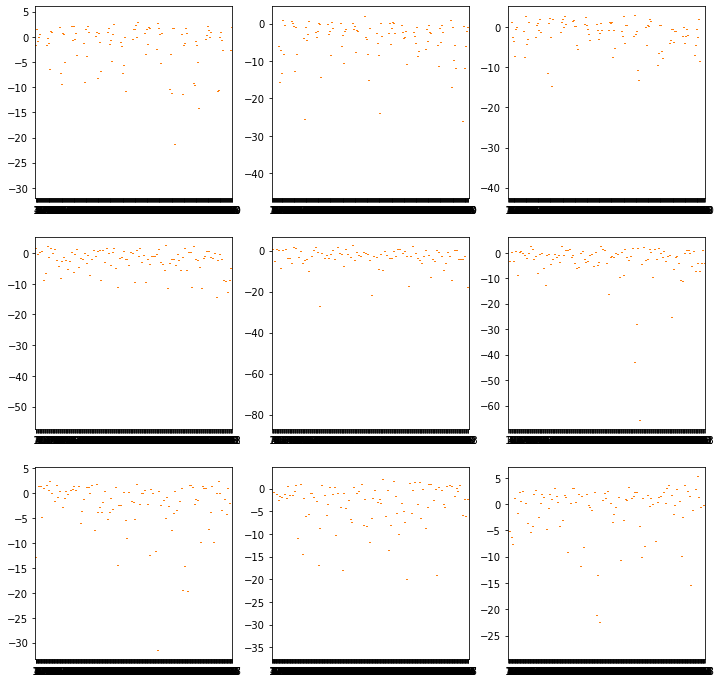

In [39]:
group_columns = ['result_white_win','result_black_win', 'result_draw']
agg_columns = ['MaeToi_white_win', 'MaeToi_black_win', 'MaeToi_draw']

mix = itertools.product(group_columns, agg_columns)

fig, ax = plt.subplots(3, 3, figsize=(12,12))

data = [botvinnik_df[botvinnik_df[first]==1].groupby('game_id').agg({second:'mean'}) for first, second in mix ]

for idx, values in enumerate(data):
    ax.flat[idx].boxplot(values, showfliers=False)

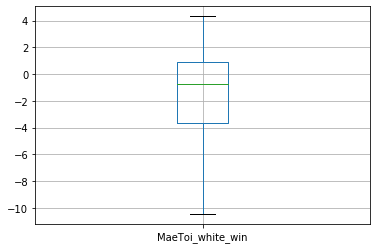

In [5]:
all_games.agg({'MaeToi_white_win':'mean'}).boxplot(showfliers=False)

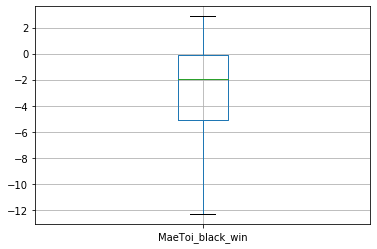

In [6]:
all_games.agg({'MaeToi_black_win':'mean'}).boxplot(showfliers=False)

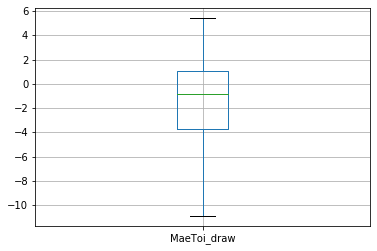

In [7]:
all_games.agg({'MaeToi_draw':'mean'}).boxplot(showfliers=False)

In [8]:
white_wins = botvinnik_df[botvinnik_df['result_white_win']==1].groupby('game_id')

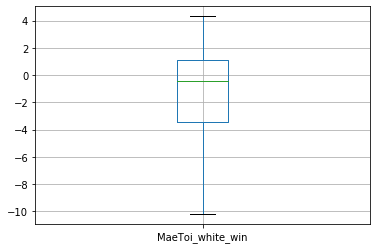

In [46]:
white_wins.agg({'MaeToi_white_win':'mean'}).boxplot(showfliers=False)

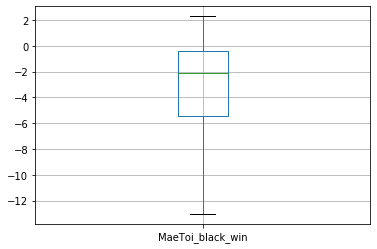

In [47]:
white_wins.agg({'MaeToi_black_win':'mean'}).boxplot(showfliers=False)

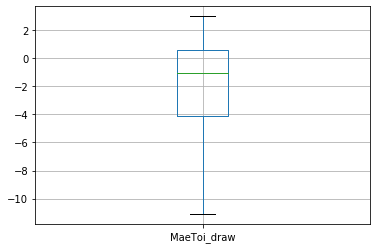

In [48]:
white_wins.agg({'MaeToi_draw':'mean'}).boxplot(showfliers=False)

In [49]:
black_wins = botvinnik_df[botvinnik_df['result_black_win']==1].groupby('game_id')

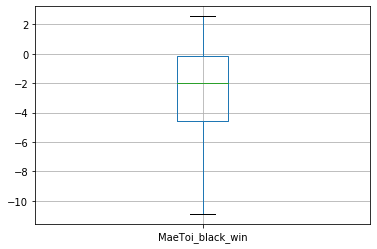

In [50]:
black_wins.agg({'MaeToi_black_win':'mean'}).boxplot(showfliers=False)

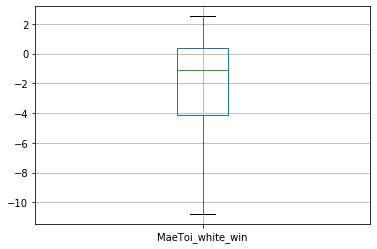

In [51]:
black_wins.agg({'MaeToi_white_win':'mean'}).boxplot(showfliers=False)

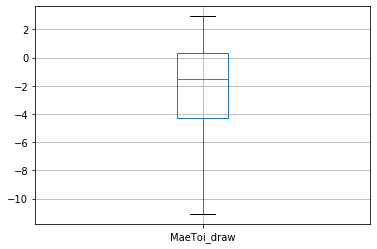

In [52]:
black_wins.agg({'MaeToi_draw':'mean'}).boxplot(showfliers=False)

In [53]:
draws = botvinnik_df[botvinnik_df['result_draw']==1].groupby('game_id')

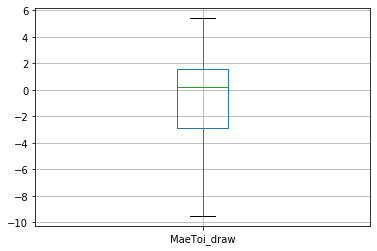

In [54]:
draws.agg({'MaeToi_draw':'mean'}).boxplot(showfliers=False)

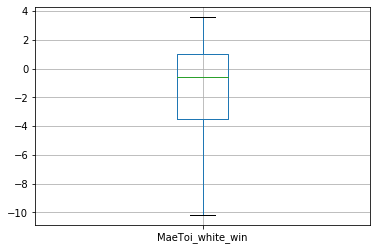

In [56]:
draws.agg({'MaeToi_white_win':'mean'}).boxplot(showfliers=False)

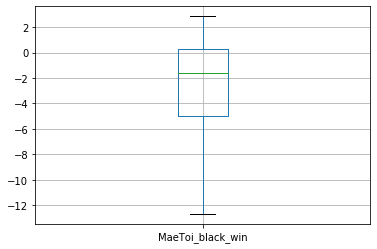

In [57]:
draws.agg({'MaeToi_black_win':'mean'}).boxplot(showfliers=False)

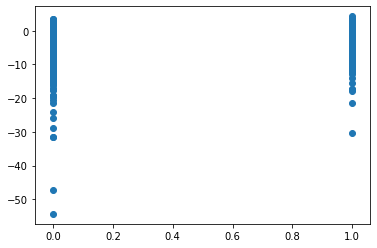

In [66]:
games = botvinnik_df.groupby('game_id')
results = games.agg({'result_white_win':'first'})
prediction = games.agg({'MaeToi_white_win':'mean'})

plt.scatter(results, prediction)

In [40]:
botvinnik_df.columns

Index(['player_id', 'game_id', 'position_id', 'position_fen', 'whose_turn',
       'result_white_win', 'result_draw', 'result_black_win', 'player_color',
       'player_piece_activity', 'opponent_piece_activity',
       'player_protected_pieces', 'opponent_protected_pieces',
       'MaeToi_white_win', 'MaeToi_black_win', 'MaeToi_draw'],
      dtype='object')